IMPORTING LIBRARY

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score,confusion_matrix

INSERTING DATASET

In [47]:
data = pd.read_csv('/content/advertising.csv')
#reading the data
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [48]:
#getting shape of the dataset
data.shape

(200, 4)

In [49]:
#getting information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [50]:
#description of dataset
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [51]:
#duplication check
print("Number of duplication is", data.duplicated().sum(),'.')

Number of duplication is 0 .


In [52]:
#getting column names
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [53]:
#scruntinizing
print('rows-->',data.shape[0])
print('columns-->',data.shape[1])

rows--> 200
columns--> 4


In [54]:
X = data.iloc[:,0:-1]

In [55]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [56]:
Y = data.iloc[:, -1]

In [57]:
Y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [58]:
X.iloc[:,0]

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [59]:
data.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [60]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


MISSING VALUES CHECK

In [61]:
val=data.isnull().sum().sort_values(ascending=False)
val.head()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [62]:
#percentage of missing values
val_per = data.isnull().sum()/data.isnull().count()*100
null = pd.DataFrame({'missing values' : val, 'Percentage': val_per.sort_values(ascending=False)})
null.head()

,missing values,Percentage
TV,0,0.0
Radio,0,0.0
Newspaper,0,0.0
Sales,0,0.0


MATRIX PLOT

Text(0.5, 1.0, 'plot to see missing values')

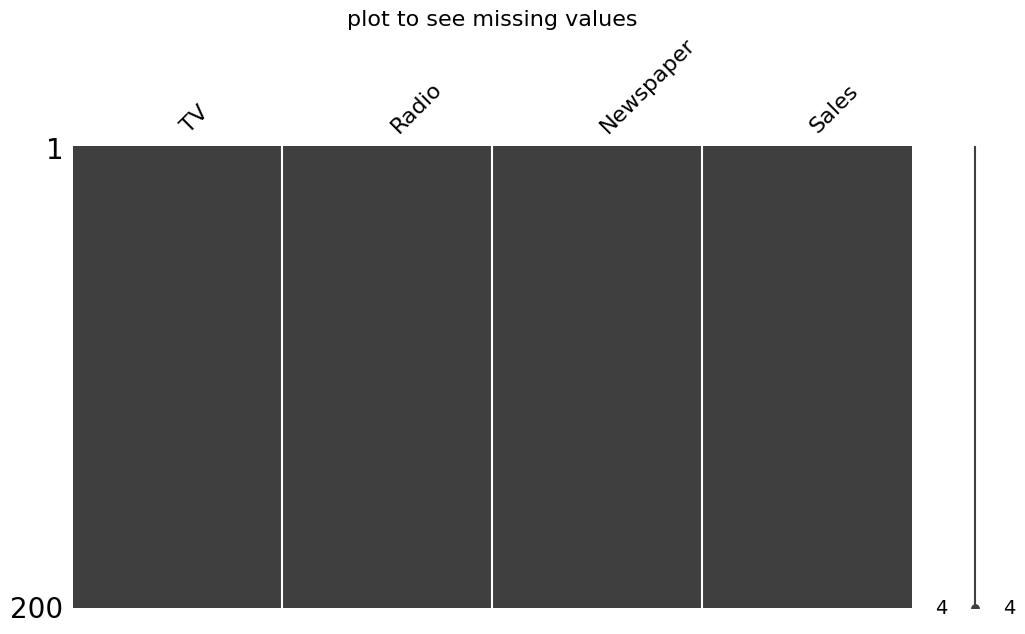

In [63]:
ms.matrix(data, figsize=(12,6))
plt.title("plot to see missing values",size=16)

BARPLOT

Text(0.5, 1.0, 'Barplot to see lacking of data values')

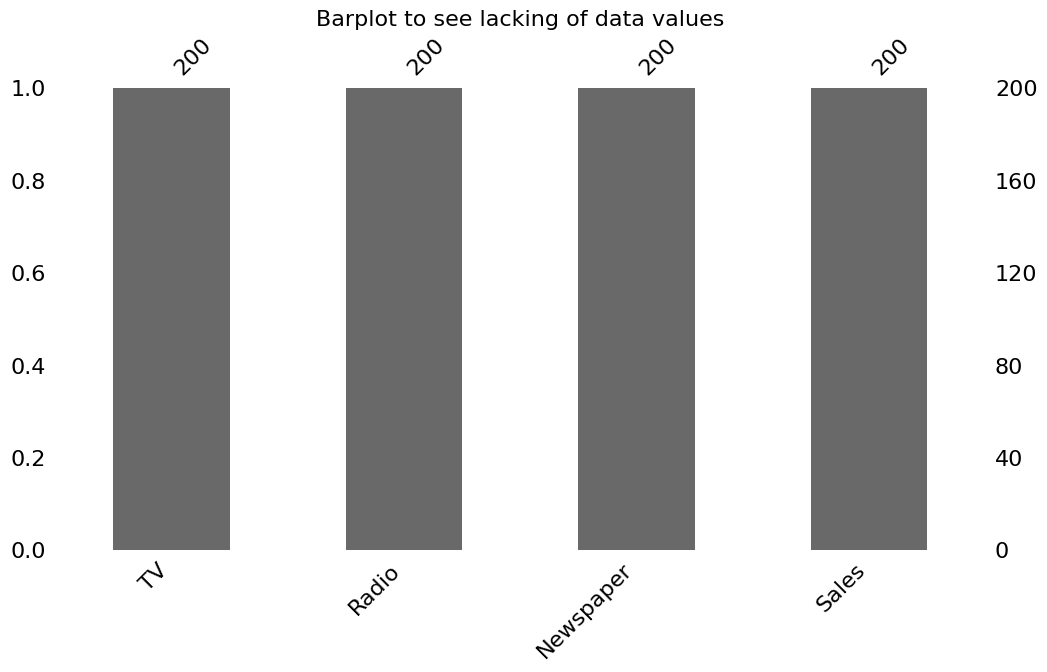

In [64]:
ms.bar(data, figsize=(12,6))
plt.title("Barplot to see lacking of data values", size=16)

VISUAL ANALYSIS

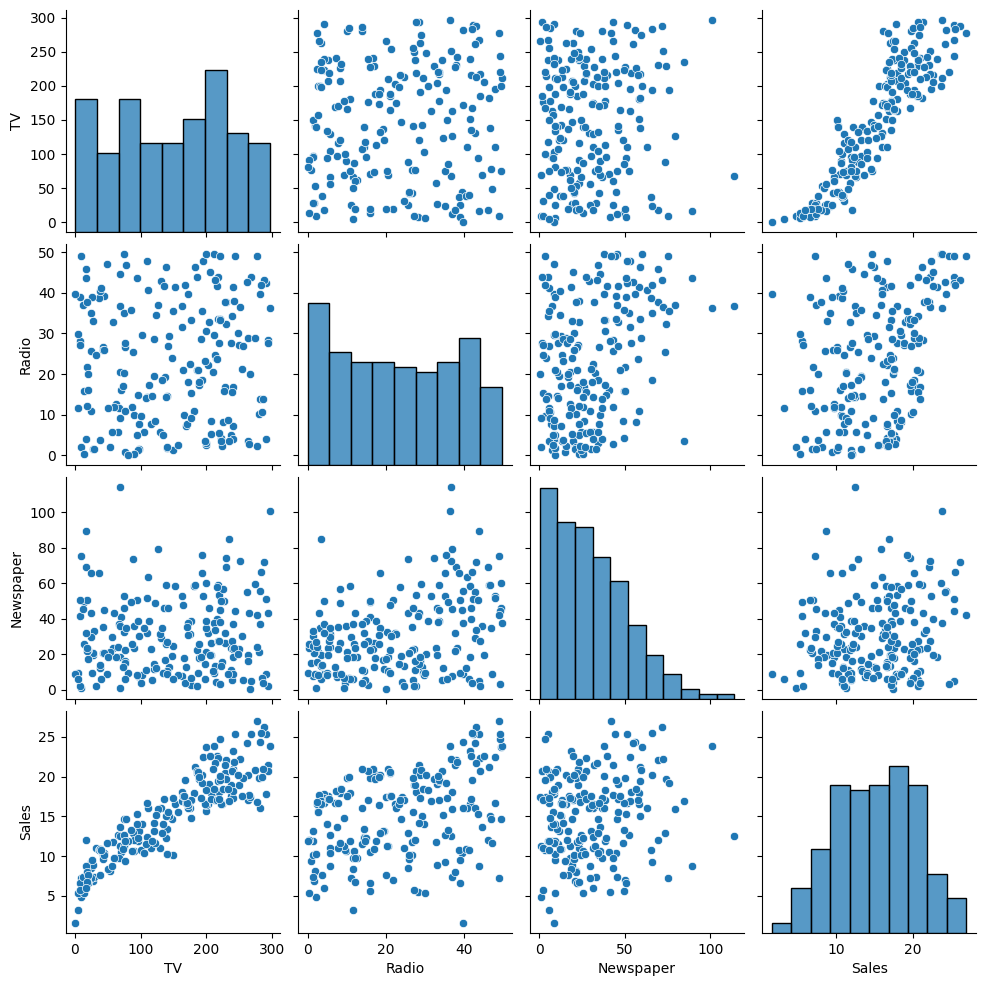

In [65]:
sns.pairplot(data=data)
plt.show()

TRAIN TEST SPLIT

In [66]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.2,random_state=3)

In [67]:
Xtrain

,TV,Radio,Newspaper
156,93.9,43.5,50.5
115,75.1,35.0,52.7
155,4.1,11.6,5.7
15,195.4,47.7,52.9
61,261.3,42.7,54.7
...,...,...,...
0,230.1,37.8,69.2
184,253.8,21.3,30.0
131,265.2,2.9,43.0
152,197.6,23.3,14.2


In [68]:
Xtest

,TV,Radio,Newspaper
40,202.5,22.3,31.6
51,100.4,9.6,3.6
139,184.9,43.9,1.7
197,177.0,9.3,6.4
170,50.0,11.6,18.4
82,75.3,20.3,32.5
183,287.6,43.0,71.8
46,89.7,9.9,35.7
70,199.1,30.6,38.7
100,222.4,4.3,49.8


In [69]:
Ytrain

156    15.3
115    12.6
155     3.2
15     22.4
61     24.2
       ... 
0      22.1
184    17.6
131    17.7
152    16.6
106     7.2
Name: Sales, Length: 160, dtype: float64

In [70]:
Ytest

40     16.6
51     10.7
139    20.7
197    14.8
170     8.4
82     11.3
183    26.2
46     10.6
70     18.3
100    16.7
179    17.6
83     13.6
25     17.0
190    10.8
159    12.9
173    16.7
95     16.9
3      16.5
41     17.1
58     23.8
14     19.0
143    10.4
12      9.2
6      11.8
182     8.7
161    13.3
128    24.7
122    16.6
101    23.8
86     12.0
64     16.0
47     23.2
158     7.3
34     11.9
38     10.1
196    14.0
4      17.9
72      8.8
67     13.4
145    10.3
Name: Sales, dtype: float64

In [71]:
Xtrain =Xtrain.astype(int)
Ytrain=Ytrain.astype(int)
Xtest=Xtest.astype(int)
Ytest=Ytest.astype(int)

In [72]:
sc = StandardScaler()

In [73]:
Xtrain_scaled = sc.fit_transform(Xtrain)
Xtest_scaled = sc.fit_transform(Xtest)

LINEAR REGRESSION

In [74]:
lg = LinearRegression()

In [75]:
lg.fit(Xtrain_scaled,Ytrain)

LinearRegression()

In [76]:
Y_pred = lg.predict(Xtest_scaled)

In [77]:
Y_pred

array([18.53901621, 10.66165216, 19.3380287 , 15.55028189,  7.76551992,
       10.30595425, 26.1895025 , 10.11667315, 19.17474859, 18.10704908,
       14.941729  , 12.2546149 , 20.39824961,  9.97967841, 13.66232789,
       14.81079066, 17.06108097, 17.32047682, 18.07925185, 21.74863382,
       19.72724632, 10.6652421 ,  8.65622546, 10.31270269,  7.6029794 ,
       12.5054136 , 22.22084785, 17.87469453, 26.20295378, 10.98704079,
       16.0115467 , 22.70205234,  7.90103347,  9.57151781,  8.88880446,
        9.81014377, 16.08523704,  8.43041178, 13.65896929, 12.42967642])

In [78]:
Ytest

40     16
51     10
139    20
197    14
170     8
82     11
183    26
46     10
70     18
100    16
179    17
83     13
25     17
190    10
159    12
173    16
95     16
3      16
41     17
58     23
14     19
143    10
12      9
6      11
182     8
161    13
128    24
122    16
101    23
86     12
64     16
47     23
158     7
34     11
38     10
196    14
4      17
72      8
67     13
145    10
Name: Sales, dtype: int64

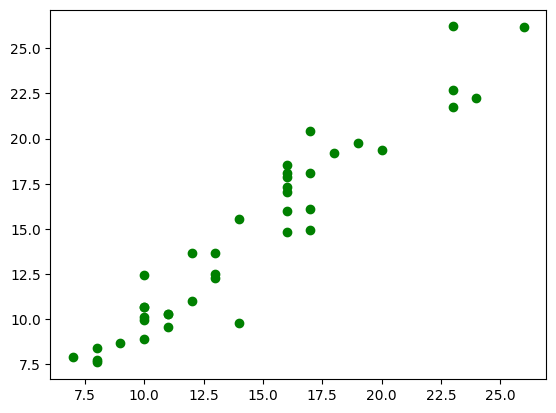

In [79]:
#visualization
plt.scatter(Ytest,Y_pred,c='g')

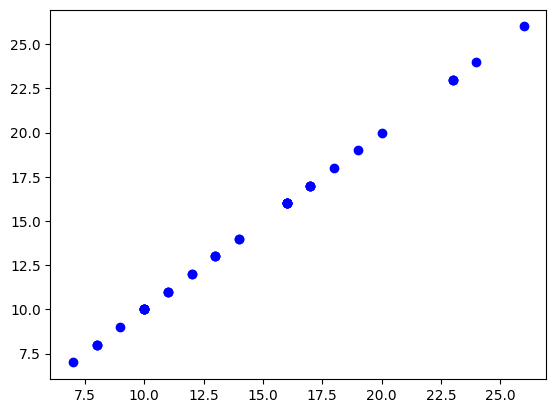

In [80]:
#visualization
plt.scatter(Ytest,Ytest,c='b')

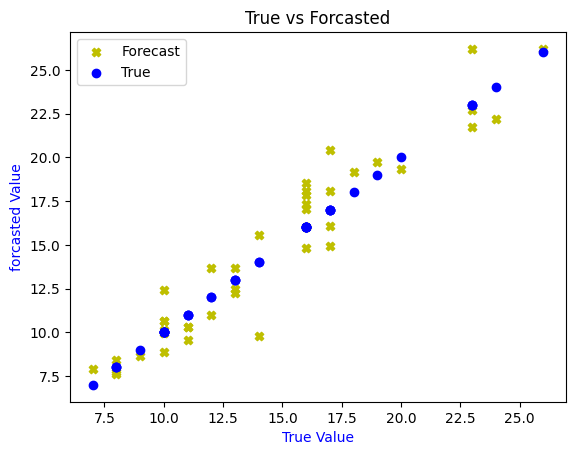

In [81]:
plt.scatter(Ytest,Y_pred,c='y',label='Forecast',marker='X')
plt.scatter(Ytest,Ytest,c='b',label='True',marker='o')
plt.xlabel('True Value',c='b')
plt.ylabel('forcasted Value', c='b')
plt.title('True vs Forcasted')
plt.legend()
plt.show()

TESTING

In [82]:
m_s_e = mean_squared_error(Ytest,Y_pred)

In [83]:
m_a_e = mean_absolute_error(Ytest,Y_pred)
m_a_e

1.181854256570757

In [84]:
r2score = r2_score(Ytest,Y_pred)
print(r2score)

0.9022805697223284
